### 神经网络
神经网络是一种模仿人脑神经元结构和功能的机器学习模型，广泛应用于人工智能领域，特别是在深度学习（Deep Learning）中。

神经网络是一种特别的机器学习方法，结构形式灵活，拓展性强，能完成机器学习的所有任务，包括监督学习、无监督学习、强化学习等任务。

神经元示意图
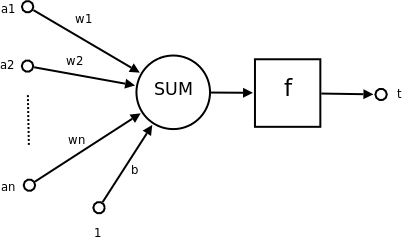

神经元的数学表现形式如下：
$$
y = f(\sum_{i=1}^{n}k_i x_i + b_i)
$$
其中，$f$是传递函数（也被称为激活函数），是一个非线性函数。


### 激活函数
激活函数为神经网络引入非线性能力，使其能学习复杂的模式。常见的激活函数包括：
1. ReLU (Rectified Linear Unit)
2. Sigmoid
3. Softmax
4. Tanh

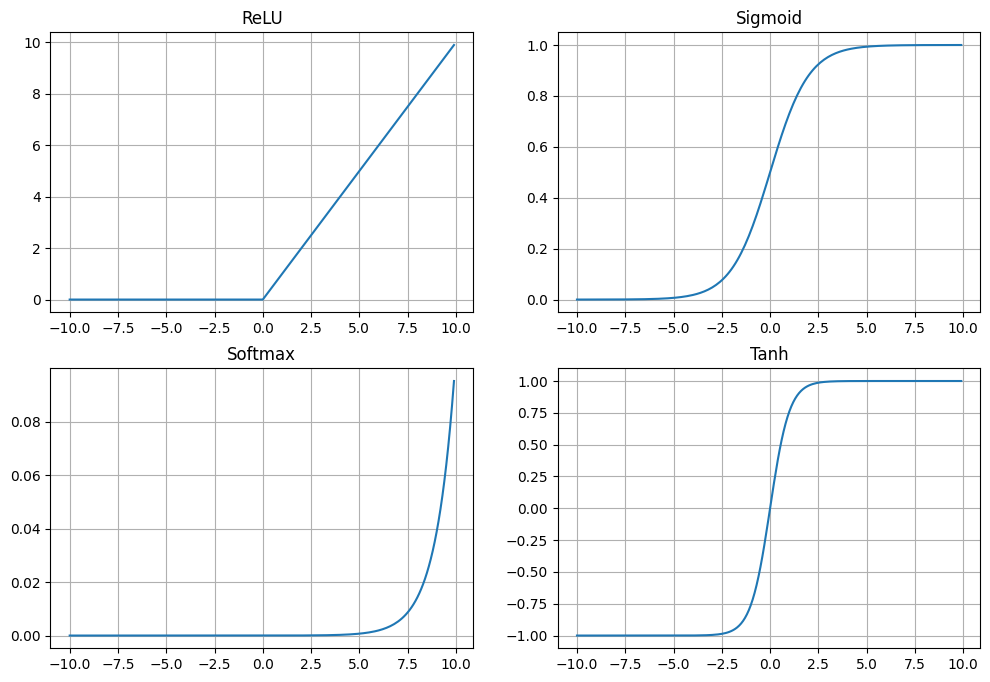

In [8]:
import numpy as np
import matplotlib.pyplot as plt

ReLU = lambda x: x * (x > 0)
Sigmoid = lambda x: 1 / (1 + np.exp(-x))
Softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)
Tanh = lambda x: np.tanh(x)

x = np.arange(-10, 10, 0.1)
y_relu = ReLU(x)
y_sigmoid = Sigmoid(x)
y_softmax = Softmax(x)
y_tanh = Tanh(x)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, y_relu)
plt.title('ReLU')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, y_sigmoid)
plt.title('Sigmoid')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x, y_softmax)
plt.title('Softmax')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(x, y_tanh)
plt.title('Tanh')
plt.grid()

plt.show()

### 多层感知器
多层感知器(Multilayer Perceptron，MLP)可以被看作是一个有向图，由多个的节点层所组成，每一层都全连接到下一层。除了输入节点，每个节点都是一个带有非线性激活函数的神经元（或称处理单元）。

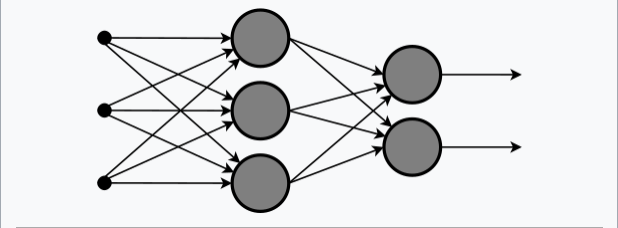



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 定义MLP模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),  # 激活函数
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

# 数据生成（简单的示例数据）
torch.manual_seed(42)  # 设置随机种子以确保结果可复现
X = torch.rand(100, 10)  # 100个样本，每个样本10维
y = (X.sum(dim=1) > 5).long()  # 简单的分类任务：特征和大于5的样本为1，否则为0

# 创建数据加载器
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 模型超参数
input_size = 10
hidden_size = 32
output_size = 2  # 二分类任务

# 初始化模型、损失函数和优化器
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # 交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
epochs = 20
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        # 前向传播
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 打印每个epoch的损失
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 测试模型（简单测试）
with torch.no_grad():
    sample_X = torch.rand(5, input_size)  # 生成5个测试样本
    predictions = model(sample_X)
    predicted_classes = torch.argmax(predictions, dim=1)
    print("Predictions:", predicted_classes)

Epoch [1/20], Loss: 0.6786
Epoch [2/20], Loss: 0.7468
Epoch [3/20], Loss: 0.7204
Epoch [4/20], Loss: 0.5819
Epoch [5/20], Loss: 0.6229
Epoch [6/20], Loss: 0.5200
Epoch [7/20], Loss: 0.4192
Epoch [8/20], Loss: 0.3530
Epoch [9/20], Loss: 0.4566
Epoch [10/20], Loss: 0.1732
Epoch [11/20], Loss: 0.3809
Epoch [12/20], Loss: 0.0980
Epoch [13/20], Loss: 0.2497
Epoch [14/20], Loss: 0.4037
Epoch [15/20], Loss: 0.1343
Epoch [16/20], Loss: 0.2190
Epoch [17/20], Loss: 0.2425
Epoch [18/20], Loss: 0.0595
Epoch [19/20], Loss: 0.2699
Epoch [20/20], Loss: 0.1515
Predictions: tensor([1, 1, 0, 1, 1])


### 卷积神经网络
卷积神经网络（convolutional neural network，CNN）是一种前馈神经网络，它的人工神经元可以响应一部分覆盖范围内的周围单元，对于大型图像处理有出色表现。卷积神经网络专注于处理图像数据（矩阵[张量]数据）。

这里的卷积操作和数学中的函数卷积有所不同，对于两个离散的函数 𝑓[𝑛] 和 𝑔[𝑛]，它们的卷积定义为：
$$
(f * g) [n] = \sum_{k = -\infty}^{\infty}f[k]g[n-k]
$$
* $f[k]$是第一个输入信号。
* $g[n-k]$是第二个信号的翻转和平移。
* 卷积的结果$(f * g) [n]$是一个新信号。

卷积神经网络中的卷积操作：
$$
Y[i, j] = \sum_{m=0}^{k-1}\sum_{n=0}^{k-1} X[i+m, j+n] \cdot W[m, n] + b
$$

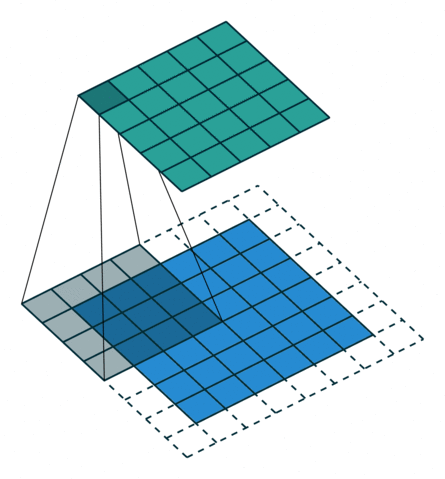

* 图中最外的一圈是Padding层，为了保持卷积之后的图像和原始图像大小一致而人为增加的内容
* 这里的卷积核就是矩阵$W$

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 定义一个简单的卷积神经网络
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)  # 卷积层1
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # 卷积层2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 最大池化层
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # 全连接层1
        self.fc2 = nn.Linear(128, 10)  # 全连接层2 (10类输出)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 卷积1 + 激活 + 池化
        x = self.pool(torch.relu(self.conv2(x)))  # 卷积2 + 激活 + 池化
        x = x.view(-1, 64 * 8 * 8)  # 展平
        x = torch.relu(self.fc1(x))  # 全连接1 + 激活
        x = self.fc2(x)  # 全连接2
        return x

# 定义设备 (GPU 或 CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 标准化
])

# 加载 CIFAR-10 数据集
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 初始化网络、损失函数和优化器
net = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()  # 损失函数
optimizer = optim.Adam(net.parameters(), lr=0.001)  # 优化器

# 训练网络
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # 梯度清零
        optimizer.zero_grad()

        # 前向传播
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # 反向传播 + 优化
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

print("Finished Training")

# 测试网络
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the test images: {100 * correct / total:.2f}%")

100%|██████████| 170498071/170498071 [00:29<00:00, 5735894.81it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[Epoch 1, Batch 100] Loss: 1.8319
[Epoch 1, Batch 200] Loss: 1.5200
[Epoch 1, Batch 300] Loss: 1.3701
[Epoch 1, Batch 400] Loss: 1.3090
[Epoch 1, Batch 500] Loss: 1.2343
[Epoch 1, Batch 600] Loss: 1.2022
[Epoch 1, Batch 700] Loss: 1.1570
[Epoch 2, Batch 100] Loss: 1.0470
[Epoch 2, Batch 200] Loss: 1.0248
[Epoch 2, Batch 300] Loss: 0.9665
[Epoch 2, Batch 400] Loss: 0.9938
[Epoch 2, Batch 500] Loss: 0.9555
[Epoch 2, Batch 600] Loss: 0.9509
[Epoch 2, Batch 700] Loss: 0.9273
[Epoch 3, Batch 100] Loss: 0.8444
[Epoch 3, Batch 200] Loss: 0.8594
[Epoch 3, Batch 300] Loss: 0.8094
[Epoch 3, Batch 400] Loss: 0.8148
[Epoch 3, Batch 500] Loss: 0.8496
[Epoch 3, Batch 600] Loss: 0.8171
[Epoch 3, Batch 700] Loss: 0.7745
[Epoch 4, Batch 100] Loss: 0.7164
[Epoch 4, Batch 200] Loss: 0.7195
[Epoch 4, Batch 300] Loss: 0.7014
[Epoch 4, Batch 400] Loss: 0.6906
[Epoch 4, Batch 500] Loss: 0.6954
[Epoch 4, Batch 600] Loss: 

### 循环神经网络

循环神经网络和动力系统非常相似，都是复用同一套结构，但是动力系统是一个自回归模型，

$$ \bm X(t+\Delta t) = F(\bm X(t))  $$

而循环神经网络是将隐藏层的输出传递到下一个时间布，从而形成时间上的依赖关系。

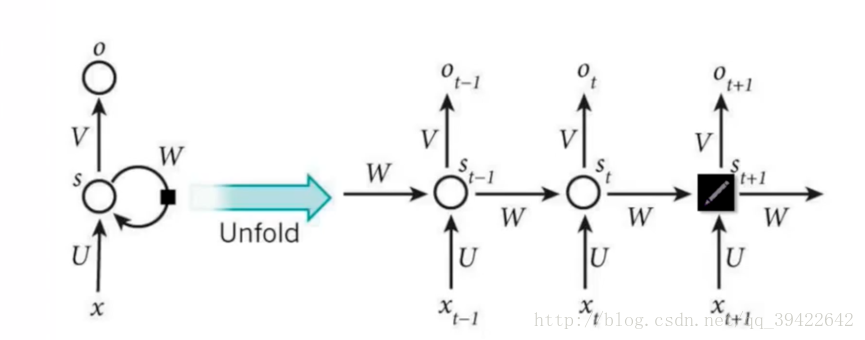

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个简单的循环神经网络并演示训练过程
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

# 生成示例数据
input_size = 10
seq_length = 5
hidden_size = 16
output_size = 2
rnn_inputs = torch.rand(32, seq_length, input_size)
rnn_labels = torch.randint(0, 2, (32,))

# 初始化模型、损失函数和优化器
rnn_model = SimpleRNN(input_size, hidden_size, output_size)
rnn_criterion = nn.CrossEntropyLoss()
rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

# 简单训练循环
for epoch in range(5):
    rnn_optimizer.zero_grad()
    rnn_outputs = rnn_model(rnn_inputs)
    loss = rnn_criterion(rnn_outputs, rnn_labels)
    loss.backward()
    rnn_optimizer.step()
    print(f"Epoch [{epoch+1}/5], Loss: {loss.item():.4f}")

神经网络相比于其他机器学习，实在是热度太高，因此发展非常迅速，以上是三种非常基础的神经网络，在此基础上，发展出了许多其他经典的基础神经网络结构，比较重要的有：
1. ResNet（残差神经网络）
 * ResNet 是一种通过引入“残差连接”来解决深度神经网络训练中梯度消失和梯度爆炸问题的网络结构。它允许网络跳过某些层，直接将输入传递给后续层，从而使得训练更深的网络成为可能。这是深度学习中突破性的重要结构之一。
2. AutoEncoder（自编码器）
 * 自编码器是一种无监督学习的神经网络结构，通过将输入数据压缩成一个低维的“编码表示”再解码重建出来，用于特征提取、降维、图像去噪等任务。
3. GAN（生成对抗网络）
 * GAN 由生成器和判别器组成，生成器用于生成看起来真实的样本，判别器用于区分生成样本和真实样本。两者通过博弈学习，生成器可以生成越来越逼真的样本。GAN 在图像生成、风格迁移等领域具有广泛应用。
4. GNN（图神经网络）
 * GNN 是用于处理图结构数据的神经网络，广泛应用于社交网络分析、推荐系统、分子化学等领域。它的基本思想是通过消息传递机制在图节点之间传播信息，从而提取全局的图结构特征。
5. UNet（用于图像分割）
 * UNet 是一种专门用于图像分割的神经网络结构，广泛应用于医学图像分析。它采用编码器-解码器架构，通过跳跃连接将编码器的特征直接传递给解码器，从而保留了更多的细节信息。
6. LSTM（长短时记忆网络）
 * LSTM 是一种特殊的循环神经网络（RNN），通过引入“记忆单元”和“门控机制”来克服传统 RNN 的长时依赖问题，广泛应用于时间序列预测、自然语言处理等任务。
7. Transformer
 * Transformer 是一种基于注意力机制的神经网络结构，已经成为自然语言处理领域的主流模型（如 BERT 和 GPT）。它通过自注意力机制捕捉全局依赖关系，训练速度快且效果显著。
8. VAE（变分自编码器）
 * VAE 是一种生成模型，通过学习数据的潜在概率分布生成新样本，与 GAN 不同的是，VAE 生成的样本具有明确的概率意义，易于解释。
9.  BERT（双向编码器表示）
* BERT 是基于 Transformer 的预训练语言模型，通过双向上下文学习语言特征，广泛应用于自然语言处理任务，如文本分类、问答系统等。
10. YOLO（You Only Look Once，用于目标检测）
* YOLO 是一种实时目标检测算法，它将目标检测问题视为一个回归问题，通过单一网络预测目标类别和位置，速度快且精度高。
11. DiffusionModel
* 扩散模型